In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Pre-Processing**

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/BA305- Team Project/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'] = df['diagnosis'].replace("M", 1)
df['diagnosis'] = df['diagnosis'].replace("B", 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# use the filter function to separate the columns
df_se_col=df.filter(regex='_se').columns
df_mean_col=df.filter(regex='_mean').columns
df_worst_col=df.filter(regex='_worst').columns

# **Dataset with ‘Mean and Worst’ Columns**


In [ ]:
# create a dataset with mean and worst columns
df_meanworst = df.drop(df_se_col, axis=1)

In [ ]:
# create X and y varibles for testing and training
X = df_meanworst.drop(columns=['diagnosis'])
y = df_meanworst['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Build the Full Tree

In [ ]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 29


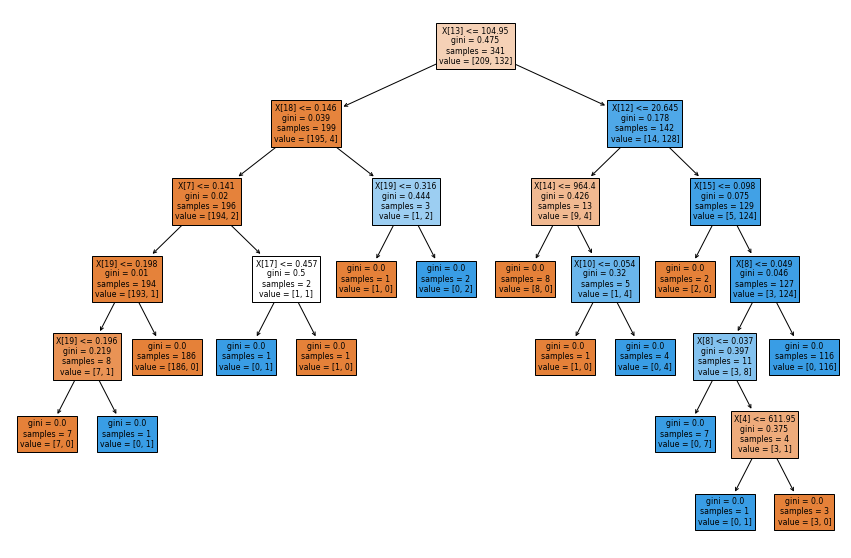

In [ ]:
# Visualize the full tree via "plot_tree" function

# Re-size the figure via matplotlib (otherwise it will be too small)
plt.figure(figsize=(15,10))

# Call plot_tree() function
# the 'filled' option generates colors in the nodes
tree.plot_tree(full_clf, filled=True);

In [ ]:
# Feed input data to model to predict y output, for training data and test data, separately
y_pred_train = full_clf.predict(X_train)
y_pred_test = full_clf.predict(X_test)

# Accuracy of full tree on training and test sets
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

# Confusion matrix of full tree on test set
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Accuracy score of full tree on training data = 100.0 %
Accuracy score of full tree on testing data = 92.1 %
Confusion Matrix on train data (watch out for overfitting!):
[[209   0]
 [  0 132]]
Confusion Matrix of full tree on test data:
[[139   9]
 [  9  71]]


# Build a Reduced Tree

In [ ]:
# The most popular ones:
# max_depth : maximum number of splits
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy
# ...

clf = DecisionTreeClassifier(
      max_depth=10, 
      min_samples_split = 40, 
      min_samples_leaf = 20,
      min_impurity_decrease = 0.01,
      criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_leaf=20, min_samples_split=40)

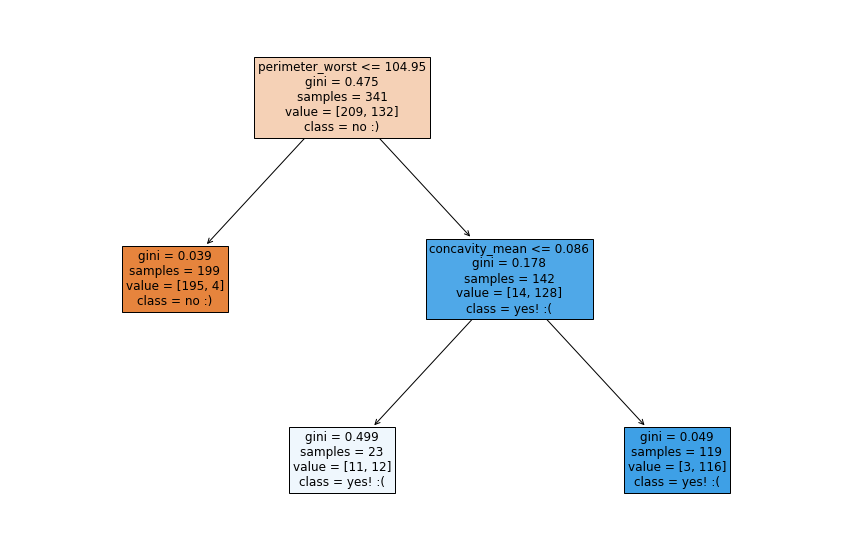

In [ ]:
# Plot the reduced tree
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['no :)','yes! :('] 
tree.plot_tree(clf, fontsize=12, feature_names=X.columns, class_names=cnames, filled=True);

In [ ]:
# Accuracy Score and Confusion matrix of "smaller" tree
y_pred = clf.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred)*100, "%")
print()

print("Confusion Matrix of reduced tree on test data:")
print(confusion_matrix(y_test, y_pred))

TPR = recall_score(y_test, y_pred).round(4)
FN = confusion_matrix(y_test, y_pred)[1][0]
TP = confusion_matrix(y_test, y_pred)[1][1]
print("True Positive Rate of reduced tree on test data:", TPR)
print("False Negative Rate of reduced tree on test data:", FN/(TP+FN))

Accuracy score of reduced tree on test data : 86.40350877192982 %

Confusion Matrix of reduced tree on test data:
[[128  20]
 [ 11  69]]
True Positive Rate of reduced tree on test data: 0.8625
False Negative Rate of reduced tree on test data: 0.1375


In [ ]:
# Visualize the tree using external 'dtreeviz' package
%%capture
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

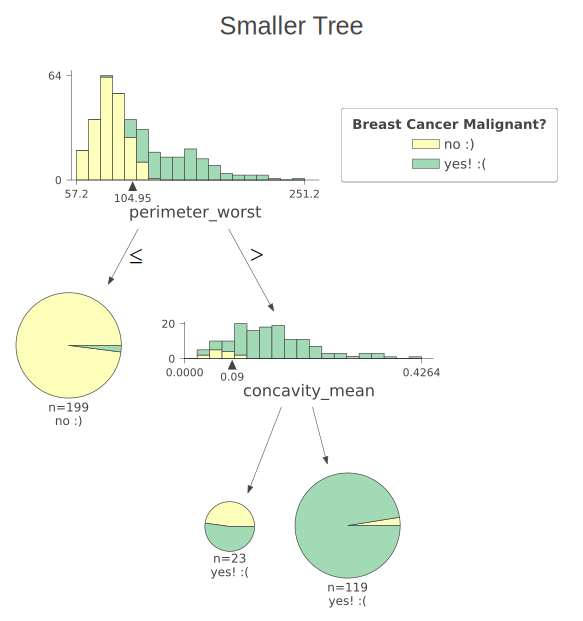

In [ ]:
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='Breast Cancer Malignant?',
               feature_names=X.columns, 
               class_names=['no :)', 'yes! :('],
               title="Smaller Tree",
               scale=1.8); 
viz

# Build a Random Forest and Create Feature Importance

In [ ]:
# Import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Run the RF classifier, specifying the number of trees to generate
# Note, being careful about overfitting is not as critical
# when using random forest classifiers, given they randomize over
# the data and the feature columns
rf = RandomForestClassifier(
    n_estimators=2000, 
    random_state=0, 
    criterion='gini', 
    min_samples_leaf = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=2000, random_state=0)

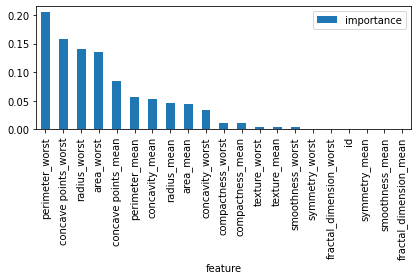

In [ ]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

# **Dataset with 'Mean' Columns**

In [ ]:
# create a dataset with mean and worst columns
df_mean=df.drop(df_se_col, axis=1)
df_mean=df_mean.drop(df_worst_col, axis=1)

In [ ]:
# create X and y varibles for testing and training
X = df_mean.drop(columns=['diagnosis'])
y = df_mean['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Build the Full Tree

In [ ]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 43


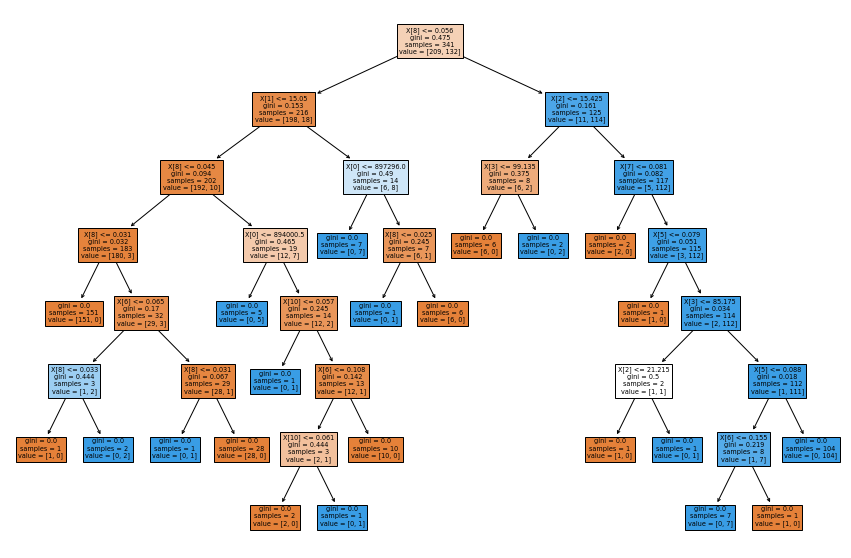

In [ ]:
# Visualize the full tree via "plot_tree" function

# Re-size the figure via matplotlib (otherwise it will be too small)
plt.figure(figsize=(15,10))

# Call plot_tree() function
# the 'filled' option generates colors in the nodes
tree.plot_tree(full_clf, filled=True);

In [ ]:
# Feed input data to model to predict y output, for training data and test data, separately
y_pred_train = full_clf.predict(X_train)
y_pred_test = full_clf.predict(X_test)

# Accuracy of full tree on training and test sets
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

# Confusion matrix of full tree on test set
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Accuracy score of full tree on training data = 100.0 %
Accuracy score of full tree on testing data = 90.8 %
Confusion Matrix on train data (watch out for overfitting!):
[[209   0]
 [  0 132]]
Confusion Matrix of full tree on test data:
[[141   7]
 [ 14  66]]


# Build a Reduced Tree

In [ ]:
# The most popular ones:
# max_depth : maximum number of splits
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy
# ...

clf = DecisionTreeClassifier(
      max_depth=10, 
      min_samples_split = 40, 
      min_samples_leaf = 20,
      min_impurity_decrease = 0.01,
      criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_leaf=20, min_samples_split=40)

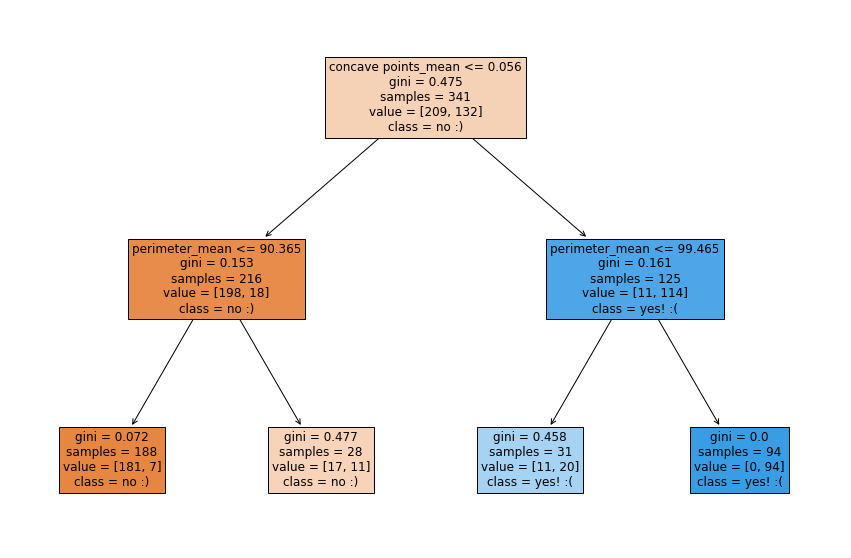

In [ ]:
# Plot the reduced tree
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['no :)','yes! :('] 
tree.plot_tree(clf, fontsize=12, feature_names=X.columns, class_names=cnames, filled=True);

In [ ]:
# Accuracy Score and Confusion matrix of "smaller" tree
y_pred = clf.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred)*100, "%")
print()

print("Confusion Matrix of reduced tree on test data:")
confusion_matrix(y_test, y_pred)

TPR = recall_score(y_test, y_pred).round(4)
FN = confusion_matrix(y_test, y_pred)[1][0]
TP = confusion_matrix(y_test, y_pred)[1][1]
print("True Positive Rate of reduced tree on test data:", TPR)
print("False Negative Rate of reduced tree on test data:", FN/(TP+FN))

Accuracy score of reduced tree on test data : 91.22807017543859 %

Confusion Matrix of reduced tree on test data:
True Positive Rate of reduced tree on test data: 0.85
False Negative Rate of reduced tree on test data: 0.15


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


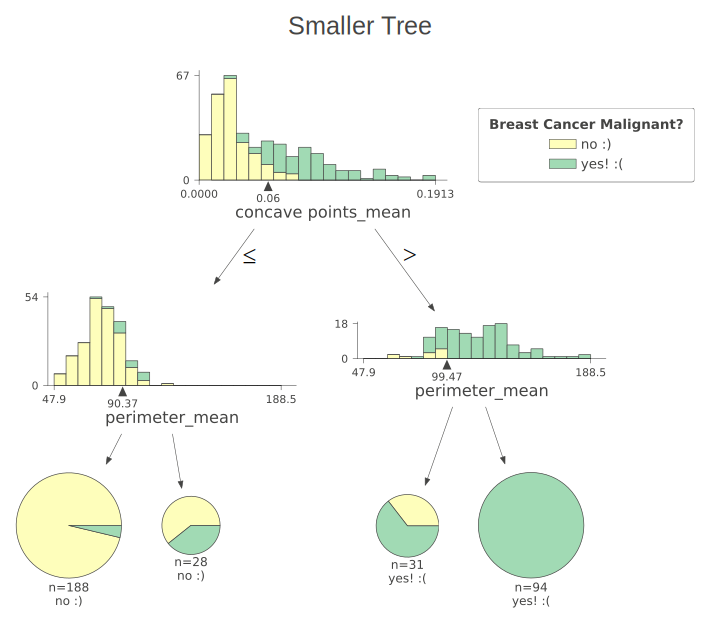

In [ ]:
# Visualize the tree using external 'dtreeviz' package
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='Breast Cancer Malignant?',
               feature_names=X.columns, 
               class_names=['no :)', 'yes! :('],
               title="Smaller Tree",
               scale=1.8); 
viz

# Build a Random Forest and Create Feature Importance

In [ ]:
# Run the RF classifier, specifying the number of trees to generate
# Note, being careful about overfitting is not as critical
# when using random forest classifiers, given they randomize over
# the data and the feature columns
rf = RandomForestClassifier(
    n_estimators=2000, 
    random_state=0, 
    criterion='gini', 
    min_samples_leaf = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=2000, random_state=0)

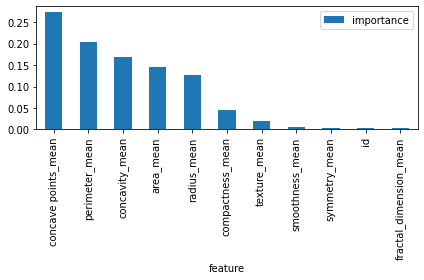

In [ ]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

# **Dataset with 'Worst' Columns**

In [ ]:
# create a dataset with all worst columns
df_worst=df.drop(df_se_col, axis=1)
df_worst=df_worst.drop(df_mean_col, axis=1)

In [ ]:
# create X and y varibles for testing and training
X = df_worst.drop(columns=['diagnosis'])
y = df_worst['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# Build the Full Tree

In [ ]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train, y_train)

print('Number of nodes', full_clf.tree_.node_count)

Number of nodes 33


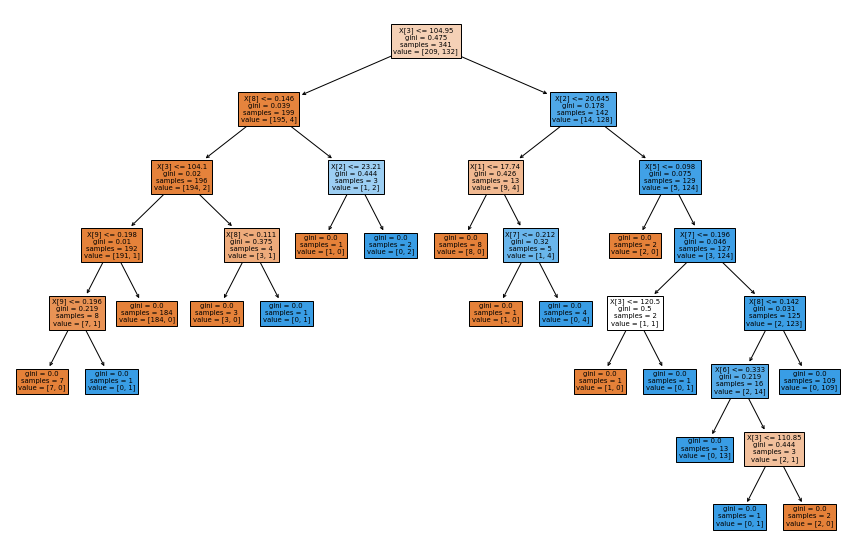

In [ ]:
# Visualize the full tree via "plot_tree" function

# Re-size the figure via matplotlib (otherwise it will be too small)
plt.figure(figsize=(15,10))

# Call plot_tree() function
# the 'filled' option generates colors in the nodes
tree.plot_tree(full_clf, filled=True);

In [ ]:
# Feed input data to model to predict y output, for training data and test data, separately
y_pred_train = full_clf.predict(X_train)
y_pred_test = full_clf.predict(X_test)

# Accuracy of full tree on training and test sets
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

# Confusion matrix of full tree on test set
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

Accuracy score of full tree on training data = 100.0 %
Accuracy score of full tree on testing data = 93.9 %
Confusion Matrix on train data (watch out for overfitting!):
[[209   0]
 [  0 132]]
Confusion Matrix of full tree on test data:
[[141   7]
 [  7  73]]


# Build a Reduced Tree

In [ ]:
# The most popular ones:
# max_depth : maximum number of splits
# min_samples_split :  The minimum number of samples required to split a node
# min_samples_leaf : Minimum # of samples inside of every leaf
# min_impurity_decrease : minimum absolute 'error' improvement to justify a split
# criterion : gini (default) or entropy
# ...

clf = DecisionTreeClassifier(
      max_depth=10, 
      min_samples_split = 40, 
      min_samples_leaf = 20,
      min_impurity_decrease = 0.01,
      criterion = 'gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01,
                       min_samples_leaf=20, min_samples_split=40)

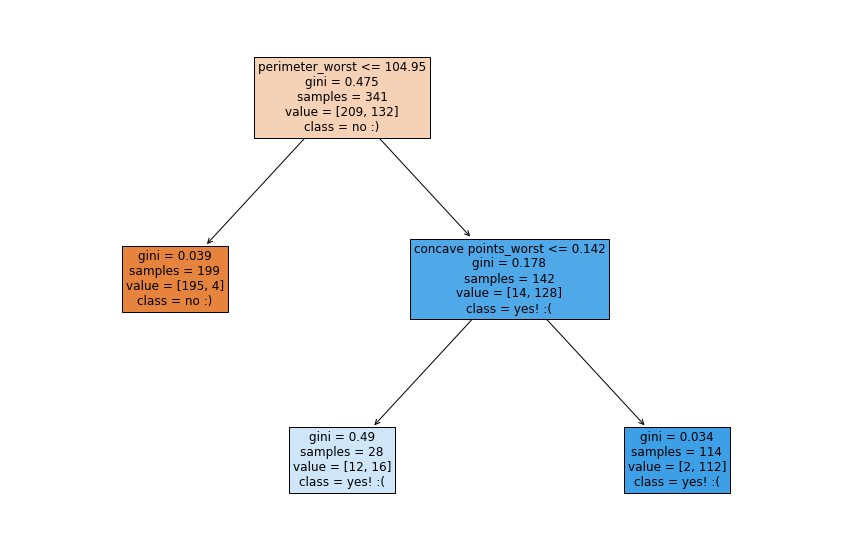

In [ ]:
# Plot the reduced tree
fig = plt.figure(figsize=(15,10))
# define class names
cnames = ['no :)','yes! :('] 
tree.plot_tree(clf, fontsize=12, feature_names=X.columns, class_names=cnames, filled=True);

In [ ]:
# Accuracy Score and Confusion matrix of "smaller" tree
y_pred = clf.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred)*100, "%")
print()

print("Confusion Matrix of reduced tree on test data:")
confusion_matrix(y_test, y_pred)

TPR = recall_score(y_test, y_pred).round(4)
FN = confusion_matrix(y_test, y_pred)[1][0]
TP = confusion_matrix(y_test, y_pred)[1][1]
print("True Positive Rate of reduced tree on test data:", TPR)
print("False Negative Rate of reduced tree on test data:", FN/(TP+FN))

Accuracy score of reduced tree on test data : 86.40350877192982 %

Confusion Matrix of reduced tree on test data:
True Positive Rate of reduced tree on test data: 0.8625
False Negative Rate of reduced tree on test data: 0.1375


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


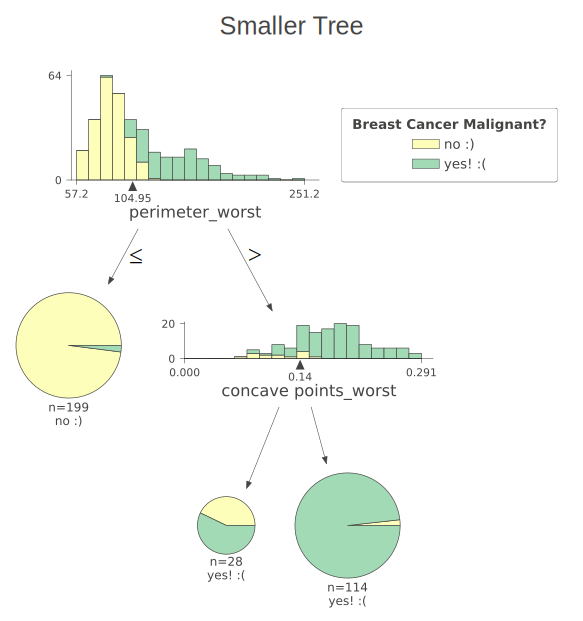

In [ ]:
# Visualize the tree using external 'dtreeviz' package
viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='Breast Cancer Malignant?',
               feature_names=X.columns, 
               class_names=['no :)', 'yes! :('],
               title="Smaller Tree",
               scale=1.8); 
viz

# Build a Random Forest and Create Feature Importance

In [ ]:
# Run the RF classifier, specifying the number of trees to generate
# Note, being careful about overfitting is not as critical
# when using random forest classifiers, given they randomize over
# the data and the feature columns
rf = RandomForestClassifier(
    n_estimators=2000, 
    random_state=0, 
    criterion='gini', 
    min_samples_leaf = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=2000, random_state=0)

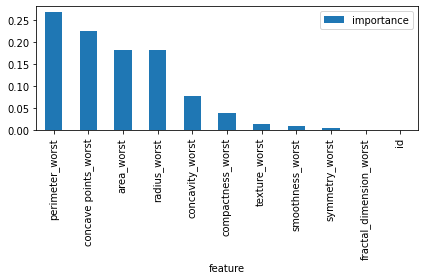

In [ ]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
df2 = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
df2 = df2.sort_values('importance', ascending = False)

# plot the importance of each feature
ax = df2.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()